In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
filename = '/content/drive/MyDrive/winemag-data-130k-v2.csv' 
data = pd.read_csv(filename)
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
data = data.drop('Unnamed: 0',axis=1).drop('description',axis=1).drop('taster_twitter_handle',axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   designation  92506 non-null   object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   region_1     108724 non-null  object 
 6   region_2     50511 non-null   object 
 7   taster_name  103727 non-null  object 
 8   title        129971 non-null  object 
 9   variety      129970 non-null  object 
 10  winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 10.9+ MB


In [6]:
data.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [7]:
data.region_2

0                       NaN
1                       NaN
2         Willamette Valley
3                       NaN
4         Willamette Valley
                ...        
129966                  NaN
129967         Oregon Other
129968                  NaN
129969                  NaN
129970                  NaN
Name: region_2, Length: 129971, dtype: object

In [8]:
data.region_1

0                        Etna
1                         NaN
2           Willamette Valley
3         Lake Michigan Shore
4           Willamette Valley
                 ...         
129966                    NaN
129967                 Oregon
129968                 Alsace
129969                 Alsace
129970                 Alsace
Name: region_1, Length: 129971, dtype: object

In [9]:
data.isna().sum(axis=0)

country           63
designation    37465
points             0
price           8996
province          63
region_1       21247
region_2       79460
taster_name    26244
title              0
variety            1
winery             0
dtype: int64

drop column

In [10]:
data = data.drop('region_2',axis=1)

drop rows

In [11]:
data = data.dropna(subset=['country', 'province', 'variety'])

In [12]:
data.isna().sum(axis=0)

country            0
designation    37453
points             0
price           8992
province           0
region_1       21183
taster_name    26243
title              0
variety            0
winery             0
dtype: int64

Replace Null values with 'Unknown'

In [13]:
data.designation.count()

92454

In [14]:
data.designation.value_counts()

Reserve              2006
Estate               1321
Reserva              1259
Riserva               698
Estate Grown          621
                     ... 
Clone Six Edition       1
Lot #2                  1
Four Barriques          1
La Garrigues            1
Camporocco              1
Name: designation, Length: 37954, dtype: int64

In [15]:
data.region_1.count()

108724

In [16]:
data.region_1.value_counts()

Napa Valley                                          4480
Columbia Valley (WA)                                 4124
Russian River Valley                                 3091
California                                           2629
Paso Robles                                          2350
                                                     ... 
Vino de la Tierra Contraviesa Alpujarra                 1
Vallée du Paradis                                       1
Vino de la Tierra Ribera del Gállego-Cinco Villas       1
Frascati                                                1
Coteaux de Verdon                                       1
Name: region_1, Length: 1229, dtype: int64

In [17]:
data.taster_name.count()

103664

In [18]:
data.taster_name.value_counts()

Roger Voss            25512
Michael Schachner     15127
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9531
Matt Kettmann          6332
Joe Czerwinski         5145
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3676
Lauren Buzzeo          1832
Susan Kostrzewa        1080
Mike DeSimone           502
Jeff Jenssen            469
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [19]:
data[['designation', 'region_1','taster_name']] = data[['designation', 'region_1','taster_name']].fillna('Unknown')

In [20]:
data.isna().sum(axis=0)

country           0
designation       0
points            0
price          8992
province          0
region_1          0
taster_name       0
title             0
variety           0
winery            0
dtype: int64

In [21]:
data[['points', 'price']].corr()

,points,price
points,1.000000,0.416197
price,0.416197,1.000000


In [22]:
data_notnull = data.dropna(subset=['price'])

In [23]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = data_notnull[['points']] 
Y = data_notnull['price'] 
lm.fit(X,Y)
print(lm.intercept_,lm.coef_)

-460.5281098249155 [5.60831516]


In [24]:
data_null = data.loc[data['price'].isnull(), :]

In [25]:
data_null['price'] = lm.predict(data_null[['points']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
data_null['price']

0         27.395309
13        27.395309
30        21.786994
31        21.786994
32        21.786994
            ...    
129844    21.786994
129860    44.220254
129863    44.220254
129893    49.828569
129964    44.220254
Name: price, Length: 8992, dtype: float64

In [27]:
data_clean = pd.concat([data_notnull, data_null], axis=0, ignore_index=True)

In [28]:
data_clean

,country,designation,points,price,province,region_1,taster_name,title,variety,winery
0,Portugal,Avidagos,87,15.000000,Douro,Unknown,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,US,Unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,US,Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,US,Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,Spain,Ars In Vitro,87,15.000000,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...
129902,Italy,Doga delle Clavule,86,21.786994,Tuscany,Morellino di Scansano,Unknown,Caparzo 2006 Doga delle Clavule (Morellino di...,Sangiovese,Caparzo
129903,Portugal,Pacheca Superior,90,44.220254,Douro,Unknown,Roger Voss,Quinta da Pacheca 2013 Pacheca Superior Red (D...,Portuguese Red,Quinta da Pacheca
129904,Portugal,Reserva,90,44.220254,Dão,Unknown,Roger Voss,Seacampo 2011 Reserva Red (Dão),Portuguese Red,Seacampo
129905,Italy,Corte Menini,91,49.828569,Veneto,Soave Classico,Kerin O’Keefe,Le Mandolare 2015 Corte Menini (Soave Classico),Garganega,Le Mandolare


In [29]:
data_clean['year'] = data_clean.title.astype('str').str.extract(r'(\d\d\d\d+)')

In [30]:
data_clean

,country,designation,points,price,province,region_1,taster_name,title,variety,winery,year
0,Portugal,Avidagos,87,15.000000,Douro,Unknown,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
1,US,Unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
2,US,Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
3,US,Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
4,Spain,Ars In Vitro,87,15.000000,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
...,...,...,...,...,...,...,...,...,...,...,...
129902,Italy,Doga delle Clavule,86,21.786994,Tuscany,Morellino di Scansano,Unknown,Caparzo 2006 Doga delle Clavule (Morellino di...,Sangiovese,Caparzo,2006
129903,Portugal,Pacheca Superior,90,44.220254,Douro,Unknown,Roger Voss,Quinta da Pacheca 2013 Pacheca Superior Red (D...,Portuguese Red,Quinta da Pacheca,2013
129904,Portugal,Reserva,90,44.220254,Dão,Unknown,Roger Voss,Seacampo 2011 Reserva Red (Dão),Portuguese Red,Seacampo,2011
129905,Italy,Corte Menini,91,49.828569,Veneto,Soave Classico,Kerin O’Keefe,Le Mandolare 2015 Corte Menini (Soave Classico),Garganega,Le Mandolare,2015


In [31]:
data_clean.isna().sum(axis=0)

country           0
designation       0
points            0
price             0
province          0
region_1          0
taster_name       0
title             0
variety           0
winery            0
year           4607
dtype: int64

In [32]:
year_notnull = data_clean.dropna(subset=['year'])
year_notnull[year_notnull['year'].map(len) > 4]

,country,designation,points,price,province,region_1,taster_name,title,variety,winery,year
5701,US,Unknown,92,75.0,Oregon,Walla Walla Valley (OR),Sean P. Sullivan,18401 Cellars 2013 Cabernet Sauvignon (Walla W...,Cabernet Sauvignon,18401 Cellars,18401
62387,US,Proprietary,92,75.0,Oregon,Walla Walla Valley (OR),Sean P. Sullivan,18401 Cellars 2013 Proprietary Red (Walla Wall...,Bordeaux-style Red Blend,18401 Cellars,18401
68010,US,Proprietary,92,75.0,Oregon,Walla Walla Valley (OR),Sean P. Sullivan,18401 Cellars 2013 Proprietary Red (Walla Wall...,Bordeaux-style Red Blend,18401 Cellars,18401
92815,US,Proprietary,91,75.0,Washington,Walla Walla Valley (WA),Sean P. Sullivan,18401 Cellars 2014 Proprietary Red (Walla Wall...,Bordeaux-style Red Blend,18401 Cellars,18401
101097,US,Unknown,92,75.0,Washington,Walla Walla Valley (WA),Sean P. Sullivan,18401 Cellars 2014 Cabernet Sauvignon (Walla W...,Cabernet Sauvignon,18401 Cellars,18401


In [33]:
year_notnull[year_notnull['year'].astype('int') > 2021]

,country,designation,points,price,province,region_1,taster_name,title,variety,winery,year
4983,US,7200,89,38.0,California,Happy Canyon of Santa Barbara,Matt Kettmann,Foxen 7200 2012 7200 Cabernet Sauvignon (Happy...,Cabernet Sauvignon,Foxen 7200,7200
5701,US,Unknown,92,75.0,Oregon,Walla Walla Valley (OR),Sean P. Sullivan,18401 Cellars 2013 Cabernet Sauvignon (Walla W...,Cabernet Sauvignon,18401 Cellars,18401
47682,US,Vogelzang Vineyard,90,50.0,California,Santa Ynez Valley,Unknown,Foxen 7200 2007 Vogelzang Vineyard Cabernet Sa...,Cabernet Sauvignon,Foxen 7200,7200
62387,US,Proprietary,92,75.0,Oregon,Walla Walla Valley (OR),Sean P. Sullivan,18401 Cellars 2013 Proprietary Red (Walla Wall...,Bordeaux-style Red Blend,18401 Cellars,18401
62482,US,Range 30 West,89,42.0,California,Happy Canyon of Santa Barbara,Matt Kettmann,Foxen 7200 2012 Range 30 West Red (Happy Canyo...,Bordeaux-style Red Blend,Foxen 7200,7200
68010,US,Proprietary,92,75.0,Oregon,Walla Walla Valley (OR),Sean P. Sullivan,18401 Cellars 2013 Proprietary Red (Walla Wall...,Bordeaux-style Red Blend,18401 Cellars,18401
71680,US,Vogelzang Vineyard,90,28.0,California,Happy Canyon of Santa Barbara,Matt Kettmann,Foxen 7200 2015 Vogelzang Vineyard Sauvignon B...,Sauvignon Blanc,Foxen 7200,7200
83203,US,7200 Grassini Family Vineyard,95,44.0,California,Happy Canyon of Santa Barbara,Matt Kettmann,Foxen 7200 2012 7200 Grassini Family Vineyard ...,Cabernet Sauvignon,Foxen 7200,7200
86231,US,Vogelzang Vineyard,88,56.0,California,Happy Canyon of Santa Barbara,Matt Kettmann,Foxen 7200 2014 Vogelzang Vineyard Cabernet Sa...,Cabernet Sauvignon,Foxen 7200,7200
89003,US,Range 30 West,89,42.0,California,Happy Canyon of Santa Barbara,Matt Kettmann,Foxen 7200 2012 Range 30 West Red (Happy Canyo...,Bordeaux-style Red Blend,Foxen 7200,7200


In [34]:
int(np.mean(year_notnull['year'].astype('int')))

2011

In [35]:
year_notnull[year_notnull['year'].astype('int') < 1800]

,country,designation,points,price,province,region_1,taster_name,title,variety,winery,year
2116,Italy,Canua,87,40.000000,Lombardy,Valtellina Superiore,Unknown,Salis 1637 2002 Canua (Valtellina Superiore),Nebbiolo,Salis 1637,1637
3667,Argentina,1492,83,7.000000,Mendoza Province,Mendoza,Michael Schachner,Don Cristobal 1492 2010 1492 Red (Mendoza),Red Blend,Don Cristobal 1492,1492
14957,Argentina,Finca La Niña,84,10.000000,Mendoza Province,Mendoza,Michael Schachner,Don Cristobal 1492 2010 Finca La Niña Malbec (...,Malbec,Don Cristobal 1492,1492
17859,Italy,Corte della Meridiana Riserva,86,28.000000,Lombardy,Valtellina Superiore,Unknown,Salis 1637 2003 Corte della Meridiana Riserva ...,Nebbiolo,Salis 1637,1637
27841,US,Bourbon Barrel Aged,91,19.000000,California,Mendocino,Jim Gordon,1000 Stories 2013 Bourbon Barrel Aged Zinfande...,Zinfandel,1000 Stories,1000
30726,Argentina,Finca La Niña,84,10.000000,Mendoza Province,Mendoza,Michael Schachner,Don Cristobal 1492 2010 Finca La Niña Cabernet...,Cabernet Sauvignon,Don Cristobal 1492,1492
45230,Argentina,Finca La Niña,84,10.000000,Mendoza Province,Mendoza,Michael Schachner,Don Cristobal 1492 2010 Finca La Niña Malbec (...,Malbec,Don Cristobal 1492,1492
49457,US,Unknown,88,25.000000,California,Rutherford,Unknown,1070 Green 2011 Sauvignon Blanc (Rutherford),Sauvignon Blanc,1070 Green,1070
62341,France,Marion,88,20.000000,Provence,Côtes de Provence,Roger Voss,1752 Signature Wines 2016 Marion Rosé (Côtes d...,Rosé,1752 Signature Wines,1752
63674,US,Unknown,91,48.000000,Oregon,Chehalem Mountains,Paul Gregutt,1789 Wines 2007 Pinot Noir (Chehalem Mountains),Pinot Noir,1789 Wines,1789


In [36]:
year_notnull[year_notnull['year'].astype('int') < 1800].year.unique()

array(['1637', '1492', '1000', '1070', '1752', '1789', '1607', '1621',
       '1150', '1503'], dtype=object)

In [37]:
data_clean = data_clean.replace(to_replace = np.nan, value =2011)

In [38]:
data_clean = data_clean.replace(to_replace = '1637', value =2011)
data_clean = data_clean.replace(to_replace = '1492', value =2011)
data_clean = data_clean.replace(to_replace = '1000', value =2011)
data_clean = data_clean.replace(to_replace = '1070', value =2011)
data_clean = data_clean.replace(to_replace = '1752', value =2011)
data_clean = data_clean.replace(to_replace = '1789', value =2011)
data_clean = data_clean.replace(to_replace = '1150', value =2011)
data_clean = data_clean.replace(to_replace = '1621', value =2011)
data_clean = data_clean.replace(to_replace = '7200', value =2011)
data_clean = data_clean.replace(to_replace = '3000', value =2011)
data_clean = data_clean.replace(to_replace = '18401', value =1840)

In [39]:
data_clean

,country,designation,points,price,province,region_1,taster_name,title,variety,winery,year
0,Portugal,Avidagos,87,15.000000,Douro,Unknown,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
1,US,Unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
2,US,Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
3,US,Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
4,Spain,Ars In Vitro,87,15.000000,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
...,...,...,...,...,...,...,...,...,...,...,...
129902,Italy,Doga delle Clavule,86,21.786994,Tuscany,Morellino di Scansano,Unknown,Caparzo 2006 Doga delle Clavule (Morellino di...,Sangiovese,Caparzo,2006
129903,Portugal,Pacheca Superior,90,44.220254,Douro,Unknown,Roger Voss,Quinta da Pacheca 2013 Pacheca Superior Red (D...,Portuguese Red,Quinta da Pacheca,2013
129904,Portugal,Reserva,90,44.220254,Dão,Unknown,Roger Voss,Seacampo 2011 Reserva Red (Dão),Portuguese Red,Seacampo,2011
129905,Italy,Corte Menini,91,49.828569,Veneto,Soave Classico,Kerin O’Keefe,Le Mandolare 2015 Corte Menini (Soave Classico),Garganega,Le Mandolare,2015


In [40]:
data_clean.isna().sum(axis=0)

country        0
designation    0
points         0
price          0
province       0
region_1       0
taster_name    0
title          0
variety        0
winery         0
year           0
dtype: int64

In [41]:
data_clean.year = data_clean.year.astype('int')

In [42]:
data_clean.describe()

,points,price,year
count,129907.000000,129907.000000,129907.000000
mean,88.447051,35.510824,2010.522358
std,3.040078,39.828086,6.308346
min,80.000000,-11.862897,1503.000000
25%,86.000000,17.000000,2009.000000
50%,88.000000,26.000000,2011.000000
75%,91.000000,44.000000,2013.000000
max,100.000000,3300.000000,2017.000000


In [43]:
len(data_clean.title.unique())

118780

In [44]:
data_clean.title.count()

129907

In [45]:
data_clean[data_clean.duplicated(['title'])].shape[0]

11127

In [46]:
data_clean=data_clean.drop_duplicates(['title'])
data_clean=data_clean.reset_index(drop=True)

In [47]:
data_clean = data_clean.drop('title',axis=1)

In [48]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118780 entries, 0 to 118779
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      118780 non-null  object 
 1   designation  118780 non-null  object 
 2   points       118780 non-null  int64  
 3   price        118780 non-null  float64
 4   province     118780 non-null  object 
 5   region_1     118780 non-null  object 
 6   taster_name  118780 non-null  object 
 7   variety      118780 non-null  object 
 8   winery       118780 non-null  object 
 9   year         118780 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 9.1+ MB


EDA

points

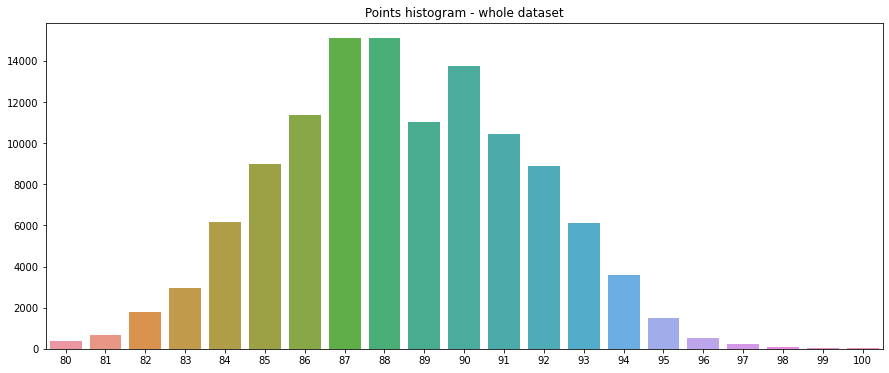

In [149]:
temp = data_clean["points"].value_counts()

plt.figure(figsize = (15,6))
plt.title('Points histogram - whole dataset')
sns.set_color_codes("pastel")
sns.barplot(x = temp.index, y=temp.values, data=data_clean)
locs, labels = plt.xticks()
plt.show()

country

In [150]:
df= data_clean[data_clean.country.isin(data_clean.country.value_counts().head(10).index)]

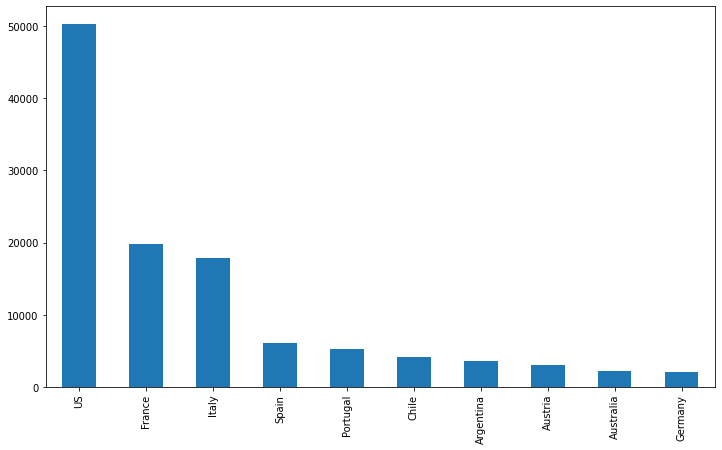

In [151]:
df['country'].value_counts().plot.bar()

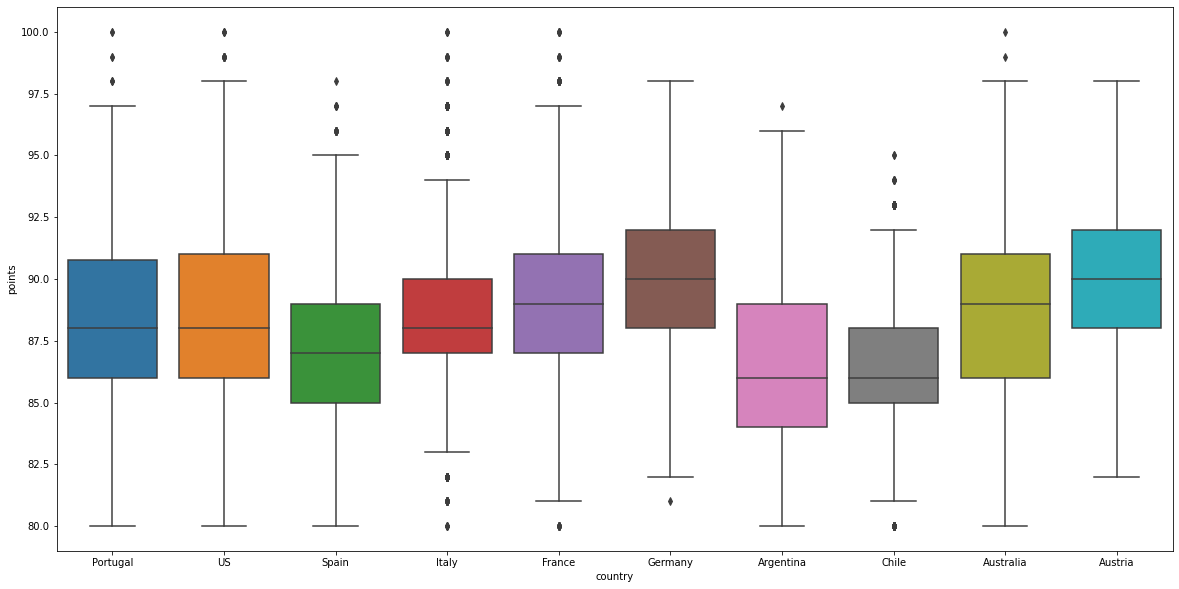

In [152]:
plt.figure(figsize = (20,10))
sns.boxplot(
    x = 'country',
    y = 'points',
    data = df
)

designation

In [153]:
df= data_clean[data_clean.designation.isin(data_clean.designation.value_counts().head(10).index)]

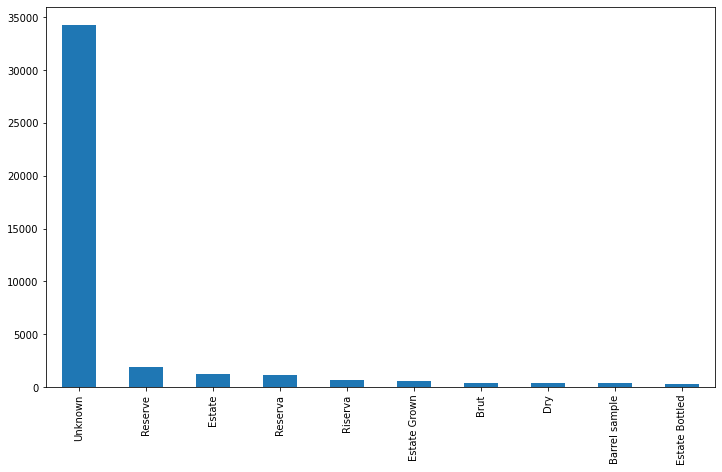

In [154]:
df['designation'].value_counts().plot.bar()

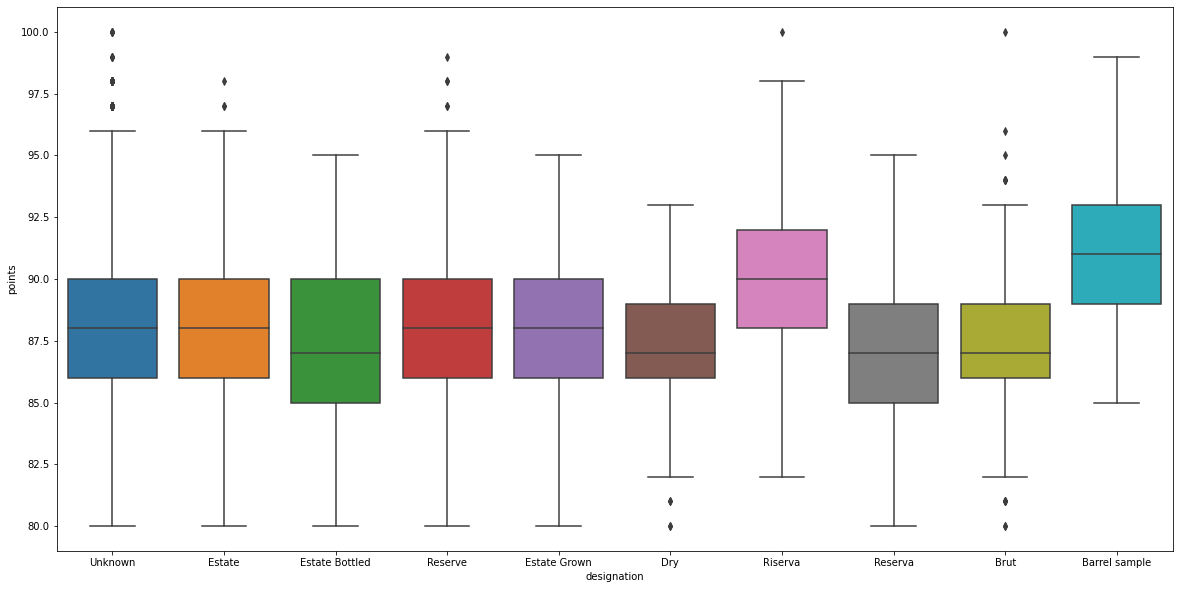

In [155]:
plt.figure(figsize = (20,10))
sns.boxplot(
    x = 'designation',
    y = 'points',
    data = df
)

price

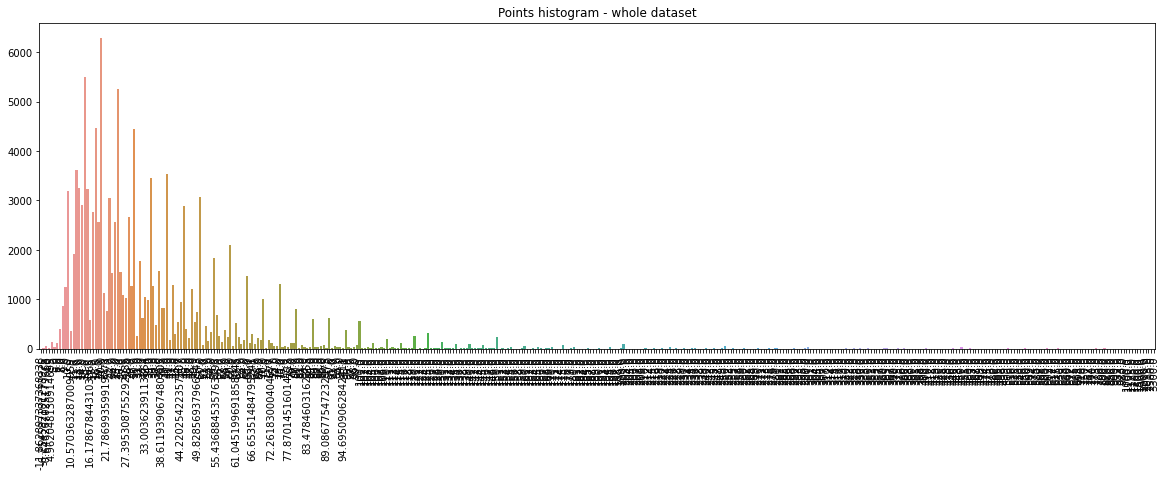

In [156]:
temp = data_clean["price"].value_counts()
plt.figure(figsize = (20,6))
plt.title('Points histogram - whole dataset')
sns.set_color_codes("pastel")
sns.barplot(x = temp.index, y=temp.values, data=data_clean)
locs, labels = plt.xticks(rotation=90)
plt.show()

province

In [157]:
df= data_clean[data_clean.province.isin(data_clean.province.value_counts().head(10).index)]

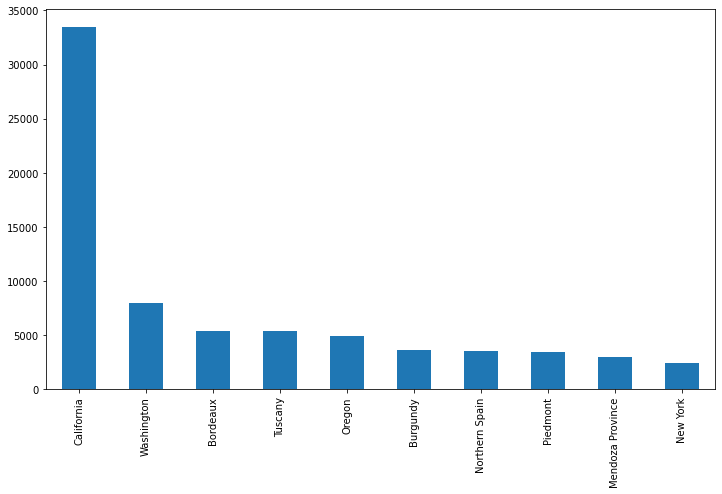

In [158]:
df['province'].value_counts().plot.bar()

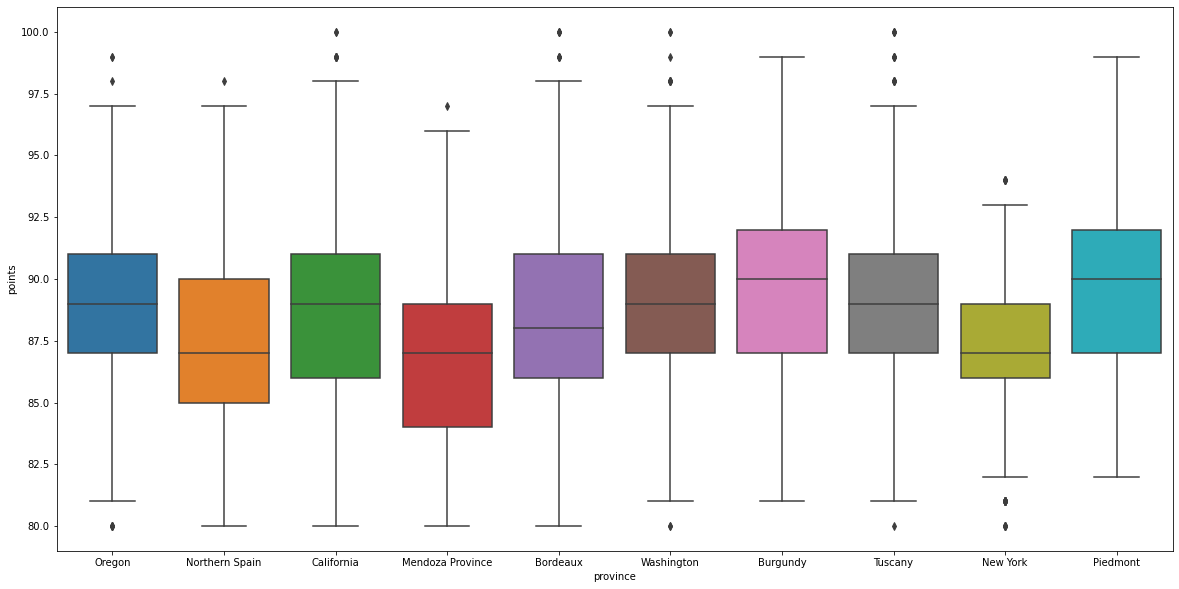

In [159]:
plt.figure(figsize = (20,10))
sns.boxplot(
    x = 'province',
    y = 'points',
    data = df
)

region_1

In [60]:
df= data_clean[data_clean.region_1.isin(data_clean.region_1.value_counts().head(10).index)]

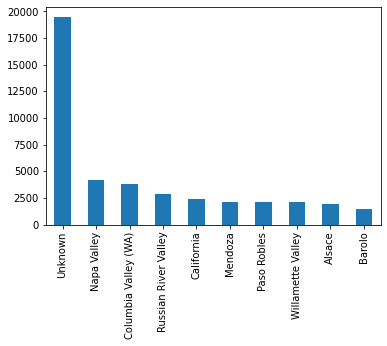

In [61]:
df['region_1'].value_counts().plot.bar()

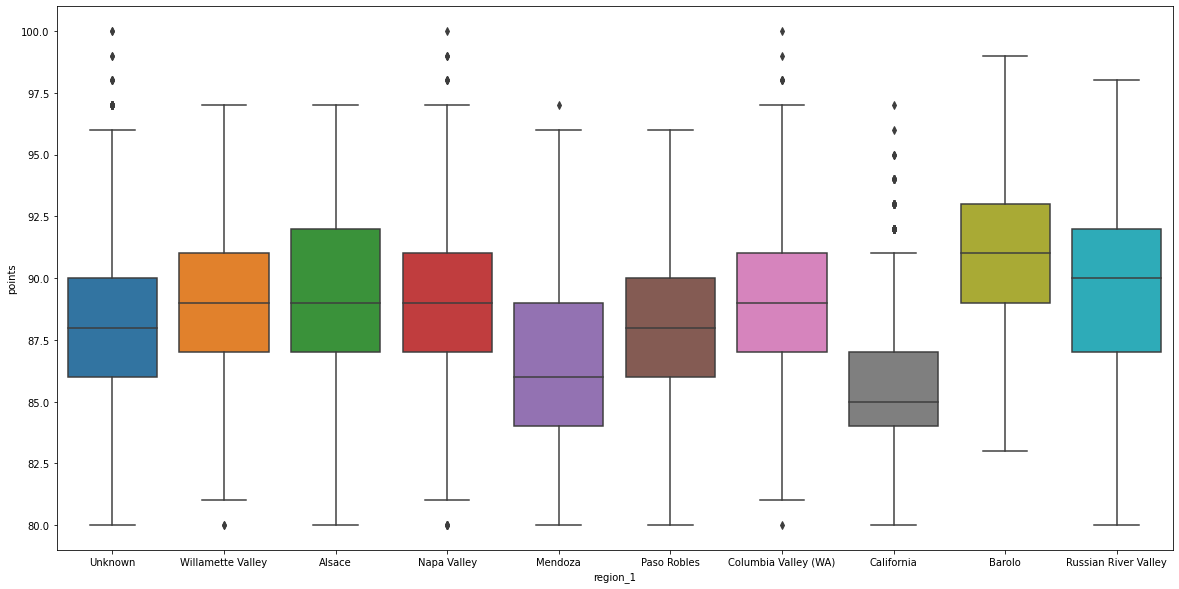

In [62]:
plt.figure(figsize = (20,10))
sns.boxplot(
    x = 'region_1',
    y = 'points',
    data = df
)

taster_name

In [63]:
df= data_clean[data_clean.taster_name.isin(data_clean.taster_name.value_counts().head(10).index)]

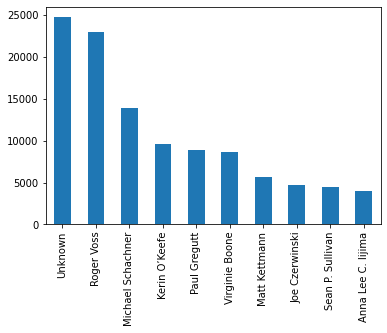

In [64]:
df['taster_name'].value_counts().plot.bar()

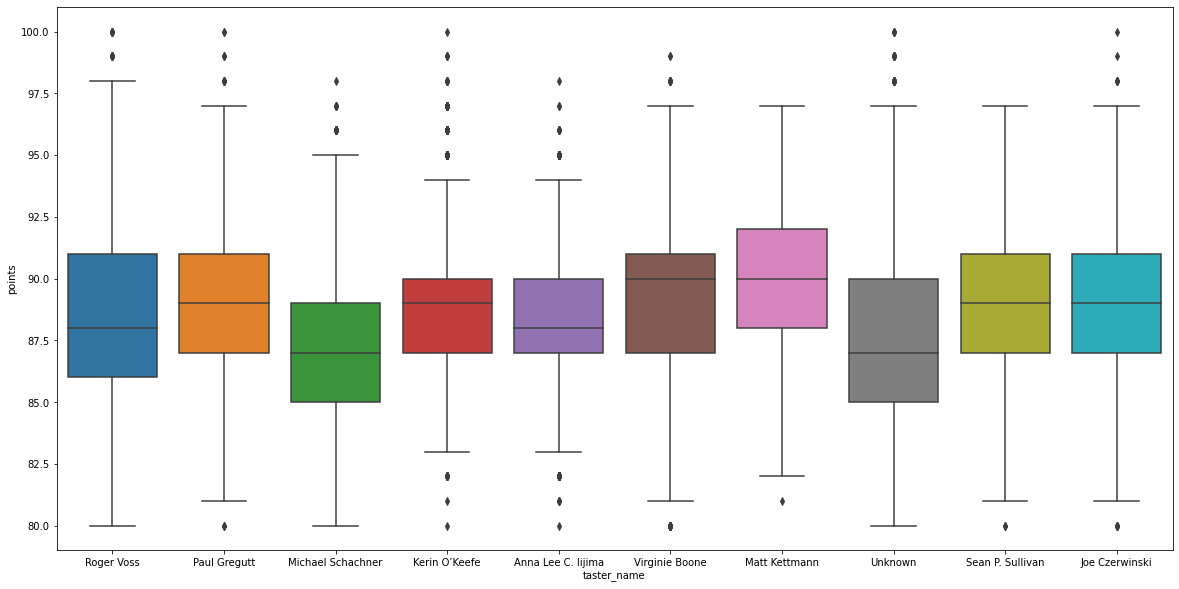

In [65]:
plt.figure(figsize = (20,10))
sns.boxplot(
    x = 'taster_name',
    y = 'points',
    data = df
)

year

In [66]:
df= data_clean[data_clean.year.isin(data_clean.year.value_counts().head(10).index)]

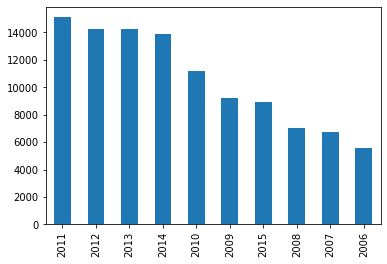

In [67]:
df['year'].value_counts().plot.bar()

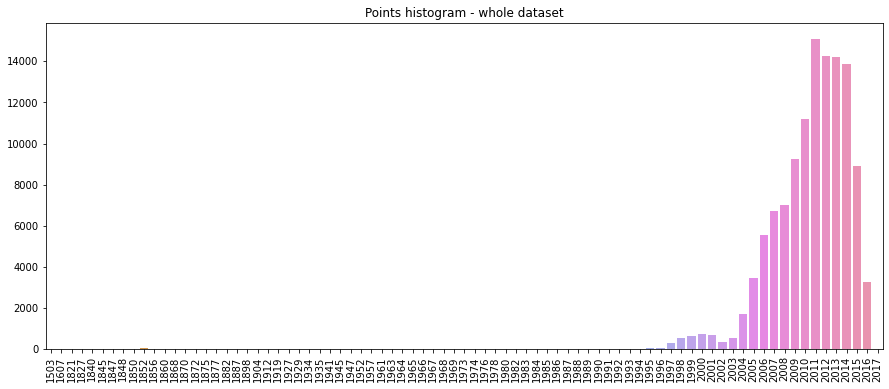

In [68]:
temp = data_clean["year"].value_counts()
plt.figure(figsize = (15,6))
plt.title('Points histogram - whole dataset')
sns.set_color_codes("pastel")
sns.barplot(x = temp.index, y=temp.values, data=data_clean)
locs, labels = plt.xticks(rotation=90)
plt.show()

winery

In [69]:
df= data_clean[data_clean.winery.isin(data_clean.winery.value_counts().head(10).index)]

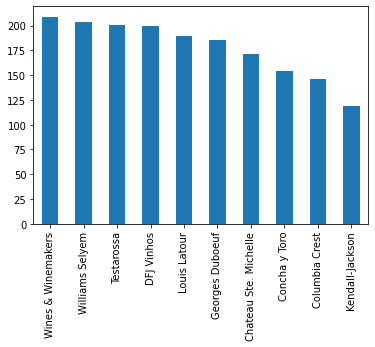

In [70]:
df['winery'].value_counts().plot.bar()

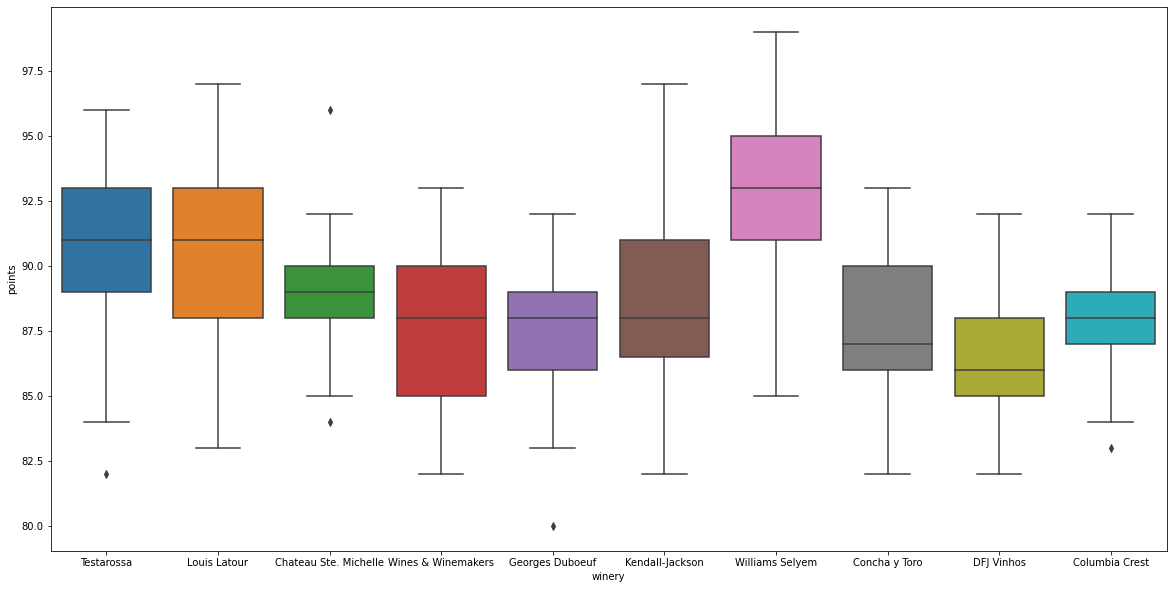

In [71]:
plt.figure(figsize = (20,10))
sns.boxplot(
    x = 'winery',
    y = 'points',
    data = df
)

variety

In [72]:
df= data_clean[data_clean.variety.isin(data_clean.variety.value_counts().head(10).index)]

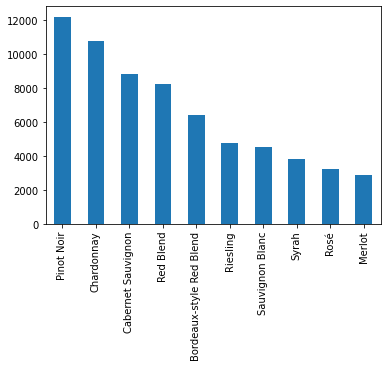

In [73]:
df['variety'].value_counts().plot.bar()

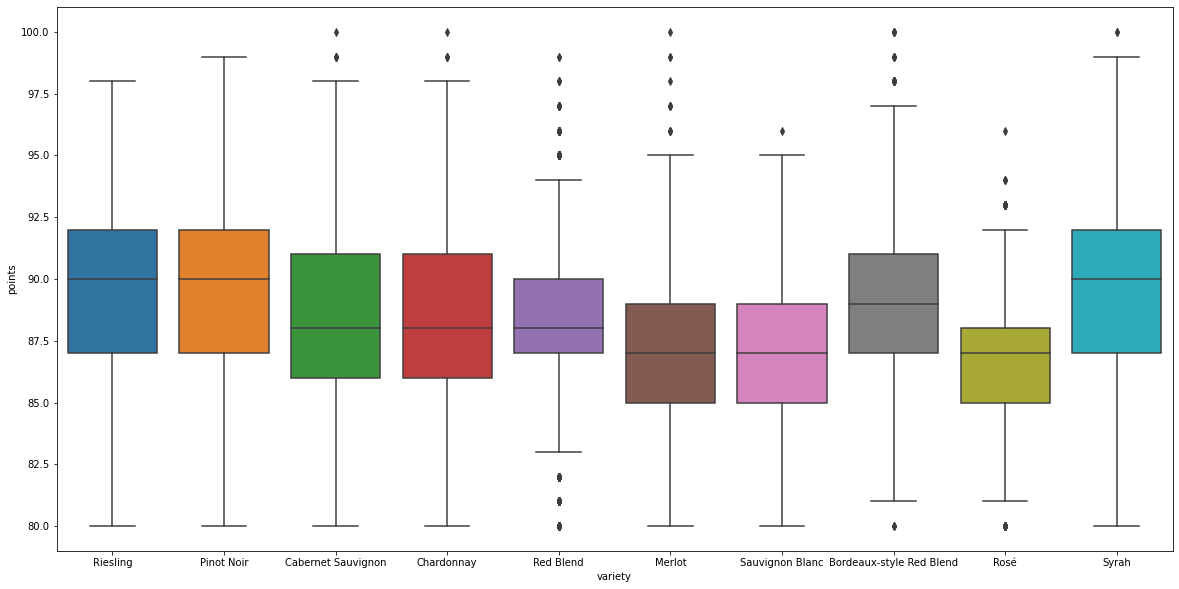

In [74]:

plt.figure(figsize = (20,10))
sns.boxplot(
    x = 'variety',
    y = 'points',
    data = df
)

Scaling +  labeling

In [49]:
data_clean

,country,designation,points,price,province,region_1,taster_name,variety,winery,year
0,Portugal,Avidagos,87,15.000000,Douro,Unknown,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011
1,US,Unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm,2013
2,US,Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,Riesling,St. Julian,2013
3,US,Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks,2012
4,Spain,Ars In Vitro,87,15.000000,Northern Spain,Navarra,Michael Schachner,Tempranillo-Merlot,Tandem,2011
...,...,...,...,...,...,...,...,...,...,...
118775,Italy,Doga delle Clavule,86,21.786994,Tuscany,Morellino di Scansano,Unknown,Sangiovese,Caparzo,2006
118776,Portugal,Pacheca Superior,90,44.220254,Douro,Unknown,Roger Voss,Portuguese Red,Quinta da Pacheca,2013
118777,Portugal,Reserva,90,44.220254,Dão,Unknown,Roger Voss,Portuguese Red,Seacampo,2011
118778,Italy,Corte Menini,91,49.828569,Veneto,Soave Classico,Kerin O’Keefe,Garganega,Le Mandolare,2015


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_scaled = scaler.fit_transform(data_clean.loc[:,['price','year']])

In [51]:
num_scaled

array([[-0.50982161,  0.09060773],
       [-0.53440926,  0.4052422 ],
       [-0.55899691,  0.4052422 ],
       ...,
       [ 0.20863583,  0.09060773],
       [ 0.34653113,  0.71987666],
       [ 0.20863583,  0.4052422 ]])

In [52]:
num_scaled[:,0]

array([-0.50982161, -0.53440926, -0.55899691, ...,  0.20863583,
        0.34653113,  0.20863583])

In [53]:
data_clean['price'] = num_scaled[:,0]

In [54]:
data_clean['year'] = num_scaled[:,1]

In [55]:
data_clean

,country,designation,points,price,province,region_1,taster_name,variety,winery,year
0,Portugal,Avidagos,87,-0.509822,Douro,Unknown,Roger Voss,Portuguese Red,Quinta dos Avidagos,0.090608
1,US,Unknown,87,-0.534409,Oregon,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm,0.405242
2,US,Reserve Late Harvest,87,-0.558997,Michigan,Lake Michigan Shore,Alexander Peartree,Riesling,St. Julian,0.405242
3,US,Vintner's Reserve Wild Child Block,87,0.719561,Oregon,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks,0.247925
4,Spain,Ars In Vitro,87,-0.509822,Northern Spain,Navarra,Michael Schachner,Tempranillo-Merlot,Tandem,0.090608
...,...,...,...,...,...,...,...,...,...,...
118775,Italy,Doga delle Clavule,86,-0.342945,Tuscany,Morellino di Scansano,Unknown,Sangiovese,Caparzo,-0.695978
118776,Portugal,Pacheca Superior,90,0.208636,Douro,Unknown,Roger Voss,Portuguese Red,Quinta da Pacheca,0.405242
118777,Portugal,Reserva,90,0.208636,Dão,Unknown,Roger Voss,Portuguese Red,Seacampo,0.090608
118778,Italy,Corte Menini,91,0.346531,Veneto,Soave Classico,Kerin O’Keefe,Garganega,Le Mandolare,0.719877


encoding

In [56]:
from sklearn.preprocessing import LabelEncoder
def encode_cate(data):
    features = ['taster_name','winery','variety','country','region_1','designation','province']
    for feature in features :
        le = LabelEncoder()
        data[feature]  = le.fit_transform(data[feature].astype('str')).astype('str')
    return data

data_clean = encode_cate(data_clean)

In [57]:
data_clean

,country,designation,points,price,province,region_1,taster_name,variety,winery,year
0,31,2321,87,-0.509822,108,1094,15,447,12949,0.090608
1,40,35088,87,-0.534409,268,1218,14,433,13011,0.405242
2,40,27953,87,-0.558997,218,549,0,476,14380,0.405242
3,40,36441,87,0.719561,268,1218,14,437,14610,0.247925
4,37,1975,87,-0.509822,262,757,12,587,14695,0.090608
...,...,...,...,...,...,...,...,...,...,...
118775,22,10126,86,-0.342945,374,685,18,503,2207,-0.695978
118776,31,24593,90,0.208636,108,1094,15,447,12860,0.405242
118777,31,27732,90,0.208636,112,1094,15,447,13878,0.090608
118778,22,8151,91,0.346531,384,999,9,197,9867,0.719877


In [58]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118780 entries, 0 to 118779
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      118780 non-null  object 
 1   designation  118780 non-null  object 
 2   points       118780 non-null  int64  
 3   price        118780 non-null  float64
 4   province     118780 non-null  object 
 5   region_1     118780 non-null  object 
 6   taster_name  118780 non-null  object 
 7   variety      118780 non-null  object 
 8   winery       118780 non-null  object 
 9   year         118780 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 9.1+ MB


In [59]:
! pip install catboost

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [171]:
from catboost import Pool, CatBoostRegressor, cv
from sklearn.model_selection import train_test_split

X=data_clean.drop('points',1)
print(X.columns)
categorical_features_indices =[0,1,3,4,5,6,7]
y=data_clean['points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2,  random_state=2022)

Index(['country', 'designation', 'price', 'province', 'region_1',
       'taster_name', 'variety', 'winery', 'year'],
      dtype='object')


In [87]:
cb = CatBoostRegressor(random_seed = 2021,loss_function = 'RMSE',iterations=2000 )
cb.fit(X_train, y_train,cat_features = categorical_features_indices, eval_set=(X_valid, y_valid), verbose=False)

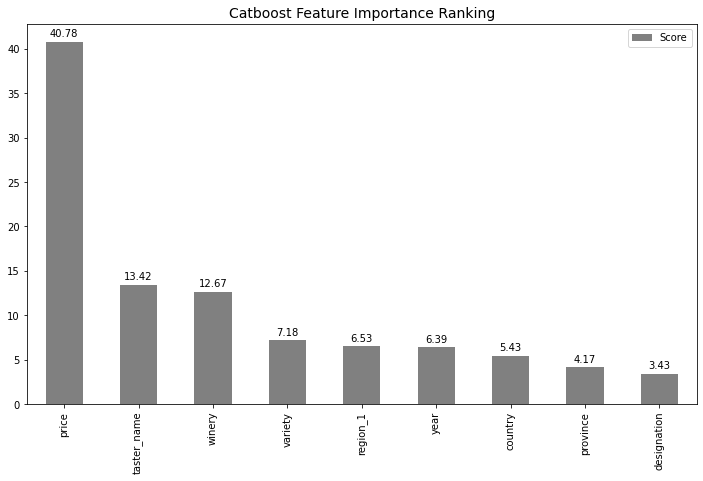

In [88]:
feature_score = pd.DataFrame(list(zip(X.dtypes.index, cb.get_feature_importance(Pool(X, label=y, cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='grey')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches
labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

train-test split

In [61]:
dataset = data_clean.loc[:,['points','price','taster_name','winery','variety','year','region_1']]

In [62]:
from sklearn.model_selection import train_test_split
X=dataset.drop('points',1)
print(X.columns)
y=dataset['points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

Index(['price', 'taster_name', 'winery', 'variety', 'year', 'region_1'], dtype='object')


RandomForest

basic model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_basic = RandomForestRegressor()
rf_basic.fit(X_train, y_train) 

In [70]:
from sklearn.metrics import mean_squared_error
y_pred1 = rf_basic.predict(X_train)
y_pred2 = rf_basic.predict(X_test)
print("train RMSE: "+ np.sqrt(mean_squared_error(y_pred1, y_train)).astype(str))
print("test RMSE: "+ np.sqrt(mean_squared_error(y_pred2, y_test)).astype(str))

train RMSE: 0.818655460435125
test RMSE: 2.119059116947295


grid search

In [182]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators': [100 , 200, 500], 'max_features': [2, 4, 6]}

RF = RandomForestRegressor()
rf = GridSearchCV(RF, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [183]:
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6],
                         'n_estimators': [100, 200, 500]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [184]:
rf.best_params_

{'max_features': 2, 'n_estimators': 500}

In [185]:
rf.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=500)

In [186]:
cvres = rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
     print(np.sqrt(-mean_score), params)

2.115598444346762 {'max_features': 2, 'n_estimators': 100}
2.1093727873045083 {'max_features': 2, 'n_estimators': 200}
2.1071234813018167 {'max_features': 2, 'n_estimators': 500}
2.1254624879368094 {'max_features': 4, 'n_estimators': 100}
2.1197647697835067 {'max_features': 4, 'n_estimators': 200}
2.117040211372511 {'max_features': 4, 'n_estimators': 500}
2.136793665589919 {'max_features': 6, 'n_estimators': 100}
2.1322871981786755 {'max_features': 6, 'n_estimators': 200}
2.1289244198384814 {'max_features': 6, 'n_estimators': 500}


In [187]:
print("train RMSE: "+ np.sqrt(-rf.score(X_train, y_train)).astype(str))
print("test RMSE: "+ np.sqrt(-rf.score(X_test, y_test)).astype(str))

train RMSE: 0.7977458711668717
test RMSE: 2.0937640090549037


LightGBM

In [71]:
for c in dataset.columns:
    col_type = dataset[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        dataset[c] = dataset[c].astype('category')

In [72]:
from sklearn.model_selection import train_test_split
X=dataset.drop('points',1)
print(X.columns)
y=dataset['points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2,  random_state=2022)

Index(['price', 'taster_name', 'winery', 'variety', 'year', 'region_1'], dtype='object')


basic model

In [73]:
from lightgbm.sklearn import LGBMRegressor
lgbm_basic=LGBMRegressor(random_seed = 2021,loss_function = 'RMSE',iterations=2000)
lgbm_basic.fit(X_train, y_train) 

LGBMRegressor(iterations=2000, loss_function='RMSE', random_seed=2021)

In [74]:
y_pred1 = lgbm_basic.predict(X_train)
y_pred2 = lgbm_basic.predict(X_test)
print("train RMSE: "+ np.sqrt(mean_squared_error(y_pred1, y_train)).astype(str))
print("test RMSE: "+ np.sqrt(mean_squared_error(y_pred2, y_test)).astype(str))

train RMSE: 1.871418667865546
test RMSE: 2.026303216864829


grid search

In [190]:
LGBM=LGBMRegressor(random_seed = 2021,loss_function = 'RMSE',iterations=2000)
param_grid = { "learning-rate": [0.001, 0.01,0.05], "max_depth": [1, 7, 9, 13]}

lgbm = GridSearchCV(LGBM, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [191]:
lgbm.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=LGBMRegressor(iterations=2000, loss_function='RMSE',
                                     random_seed=2021),
             param_grid={'learning-rate': [0.001, 0.01, 0.05],
                         'max_depth': [1, 7, 9, 13]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [192]:
lgbm.best_params_

{'learning-rate': 0.001, 'max_depth': 13}

In [193]:
lgbm.best_estimator_

LGBMRegressor(iterations=2000, learning-rate=0.001, loss_function='RMSE',
              max_depth=13, random_seed=2021)

In [194]:
cvres = lgbm.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
     print(np.sqrt(-mean_score), params)

2.2452045996763403 {'learning-rate': 0.001, 'max_depth': 1}
2.053054818878503 {'learning-rate': 0.001, 'max_depth': 7}
2.0443920946333463 {'learning-rate': 0.001, 'max_depth': 9}
2.0371979907056654 {'learning-rate': 0.001, 'max_depth': 13}
2.2452045996763403 {'learning-rate': 0.01, 'max_depth': 1}
2.053054818878503 {'learning-rate': 0.01, 'max_depth': 7}
2.0443920946333463 {'learning-rate': 0.01, 'max_depth': 9}
2.0371979907056654 {'learning-rate': 0.01, 'max_depth': 13}
2.2452045996763403 {'learning-rate': 0.05, 'max_depth': 1}
2.053054818878503 {'learning-rate': 0.05, 'max_depth': 7}
2.0443920946333463 {'learning-rate': 0.05, 'max_depth': 9}
2.0371979907056654 {'learning-rate': 0.05, 'max_depth': 13}


In [195]:
print("train RMSE: "+ np.sqrt(-lgbm.score(X_train, y_train)).astype(str))
print("test RMSE: "+ np.sqrt(-lgbm.score(X_test, y_test)).astype(str))

train RMSE: 1.8783535372185498
test RMSE: 2.028599615188938


CatBoost

In [75]:
dataset = data_clean.loc[:,['points','price','taster_name','winery','variety','country','region_1']]

In [76]:
from sklearn.model_selection import train_test_split
X=dataset.drop('points',1)
print(X.columns)
categorical_features_indices =[1,2,3,5]
y=dataset['points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2,  random_state=2022)

Index(['price', 'taster_name', 'winery', 'variety', 'country', 'region_1'], dtype='object')


basic model

In [ ]:
from catboost import Pool, CatBoostRegressor
cb_basic = CatBoostRegressor(random_seed = 2021,loss_function = 'RMSE')
cb_basic.fit(X_train, y_train) 

In [78]:
y_pred1 = cb_basic.predict(X_train)
y_pred2 = cb_basic.predict(X_test)
print("train RMSE: "+ np.sqrt(mean_squared_error(y_pred1, y_train)).astype(str))
print("test RMSE: "+ np.sqrt(mean_squared_error(y_pred2, y_test)).astype(str))

train RMSE: 2.0375882195709627
test RMSE: 2.113842751358779


grid search

In [174]:
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate' : [0.01, 0.1], 'iterations' : [500, 2000] }
CB = CatBoostRegressor(random_seed = 2021,loss_function = 'RMSE')
cb = GridSearchCV(CB, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [175]:
cb.fit(X_train, y_train,cat_features = categorical_features_indices, eval_set=(X_valid, y_valid),verbose=False ) #, eval_set=(X_valid, y_valid), verbose=False)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f0e7bff92d0>,
             param_grid={'iterations': [500, 2000],
                         'learning_rate': [0.01, 0.1]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [176]:
cb.best_params_

{'iterations': 2000, 'learning_rate': 0.1}

In [177]:
cb.best_estimator_

In [178]:
cvres = cb.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
     print(np.sqrt(-mean_score), params)

2.0989057971010983 {'iterations': 500, 'learning_rate': 0.01}
2.0070380753427877 {'iterations': 500, 'learning_rate': 0.1}
2.0306562760253573 {'iterations': 2000, 'learning_rate': 0.01}
1.9950572000648625 {'iterations': 2000, 'learning_rate': 0.1}


In [179]:
print("train RMSE: "+ np.sqrt(-cb.score(X_train, y_train)).astype('str'))
print("test RMSE: "+ np.sqrt(-cb.score(X_test, y_test)).astype('str'))

train RMSE: 1.7801422007092464
test RMSE: 1.977145084802631


Final Model

In [79]:
final = CatBoostRegressor(random_seed = 2021,loss_function = 'RMSE',iterations = 2000, learning_rate = 0.1)
final.fit(X_train, y_train,cat_features = categorical_features_indices, eval_set=(X_valid, y_valid), verbose=False)

In [80]:
y_pred1 = final.predict(X_train)
y_pred2 = final.predict(X_test)
print("train RMSE: "+ np.sqrt(mean_squared_error(y_pred1, y_train)).astype(str))
print("test RMSE: "+ np.sqrt(mean_squared_error(y_pred2, y_test)).astype(str))

train RMSE: 1.7801422007092464
test RMSE: 1.977145084802631


In [82]:
y_pred2

array([92.32055619, 92.0798806 , 88.58570278, ..., 88.43453314,
       92.47562783, 88.33328146])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


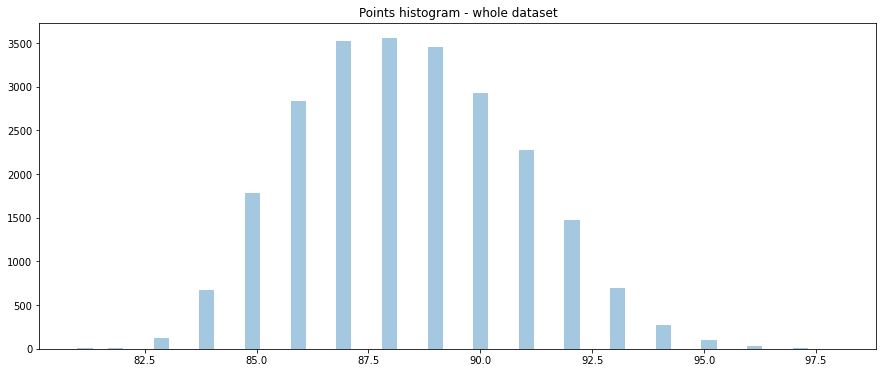

In [90]:
plt.figure(figsize = (15,6))
plt.title('Points histogram - whole dataset')
sns.set_color_codes("pastel")
sns.distplot(np.round(y_pred2), kde=False)
locs, labels = plt.xticks()
plt.show()

In [99]:
test = pd.DataFrame(y_test)

In [100]:
test['pred'] = y_pred2

In [101]:
test

,points,pred
35213,94,92.320556
24116,92,92.079881
84027,87,88.585703
97065,86,87.656488
14971,86,86.774676
...,...,...
102925,92,90.158717
15820,86,84.941632
72832,88,88.434533
81265,92,92.475628


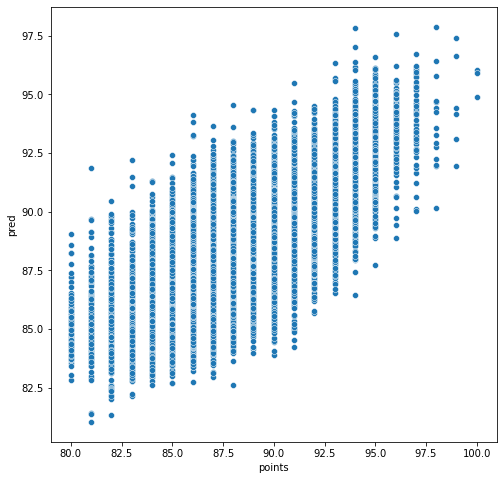

In [104]:
#sns.pointplot(test['points'],test['pred'])
plt.figure(figsize = (8,8)) 
sns.scatterplot(data=test, x="points", y="pred")

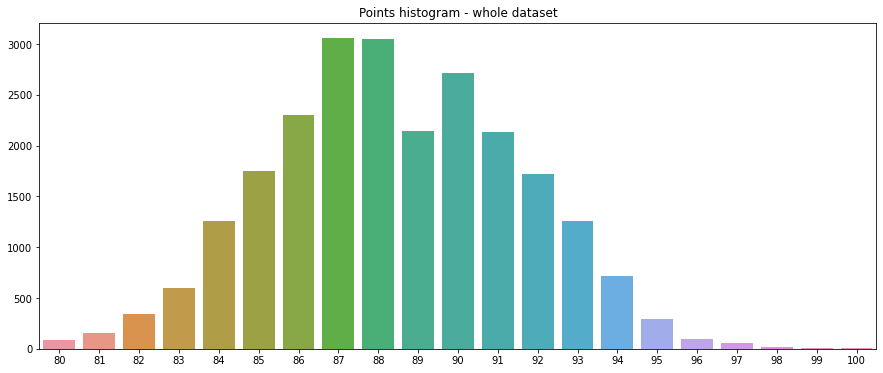

In [87]:
temp = y_test.value_counts()

plt.figure(figsize = (15,6))
plt.title('Points histogram - whole dataset')
sns.set_color_codes("pastel")
sns.barplot(x = temp.index, y=temp.values, data=y_test)
locs, labels = plt.xticks()
plt.show()

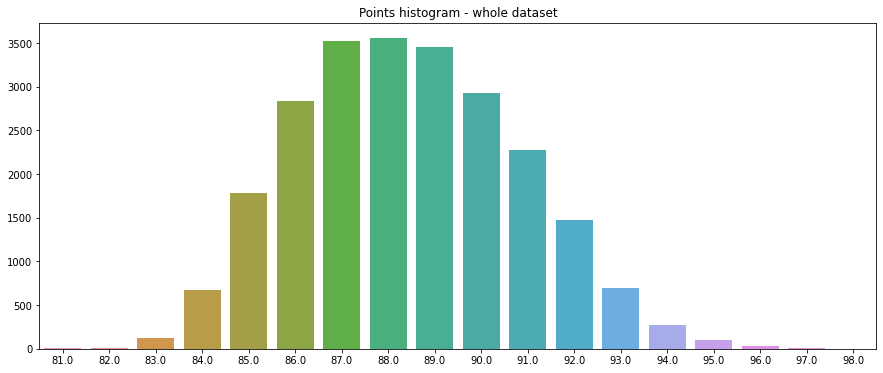

In [106]:
temp = np.round(test['pred']).value_counts()

plt.figure(figsize = (15,6))
plt.title('Points histogram - whole dataset')
sns.set_color_codes("pastel")
sns.barplot(x = temp.index, y=temp.values, data=test)
locs, labels = plt.xticks()
plt.show()